<a href="https://colab.research.google.com/github/ronishranjan/LET-S-GROW-MORE-INTERN/blob/main/stockmarket_price_of_netfilx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#!/usr/bin/env python
# coding: utf-8

# # Importing Libraries


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
import torch
import torch.nn as nn

In [10]:
import pandas as pd



In [15]:
import os
os.listdir("/content/")


['.config', 'netflix.csv', 'sample_data']

In [16]:
import pandas as pd

# Read the uploaded CSV file
df = pd.read_csv("/content/netflix.csv")

closed_prices = df["Close"]


In [17]:
seq_len = 15

In [18]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()


In [19]:
X=[]
Y=[]


In [20]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])


In [21]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]

In [22]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

In [23]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

In [24]:
model = Model(1,64)

In [25]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

In [26]:
loss_fn = nn.MSELoss()

In [27]:
num_epochs=100

In [32]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())

10 epoch loss 2.0503063e-05
20 epoch loss 1.9460227e-05
30 epoch loss 1.8934892e-05
40 epoch loss 1.8655011e-05
50 epoch loss 1.8493447e-05
60 epoch loss 1.8391947e-05
70 epoch loss 1.8323706e-05
80 epoch loss 1.8274222e-05
90 epoch loss 1.823518e-05


In [33]:
model.eval()
with torch.no_grad():
    output=model(test_x)

In [34]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())

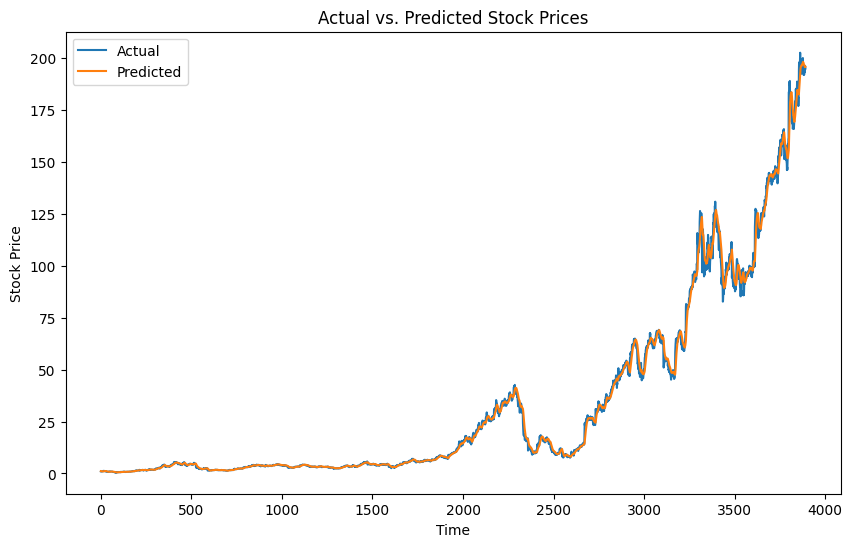

In [35]:
import matplotlib.pyplot as plt

# Assuming pred and real are NumPy arrays
plt.figure(figsize=(10, 6))
plt.plot(real, label="Actual")
plt.plot(pred, label="Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.show()
